# VALIDATION CURVE

This notebook is a supplement for *Chapter 3. Dimensionality Reduction Techniques* of **Machine Learning For Everyone** book.

# 1. Dataset

Let's import the data and have a look at it:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml4everyone/master/data/dataset_example1.csv', delimiter=',', header=0)

The data contains 112 observations and represent certain values of $x$ and certain values of $y$

In [23]:
df.head()

,x,y
0,2.2,3.1
1,1.4,6.4
2,1.4,9.1
3,4.9,6.2
4,6.3,4.7


Let's visualize $x$ and $y$ for a better picture of x-y relationship:

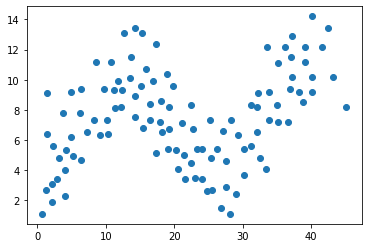

In [24]:
plt.scatter(df['x'], df['y'])
plt.show()

# 2. Bias-Variance Graph

The goal is to plot the following graph for a polynomial model. The y-axis represents **error**, the x-axis represents **model's complexity** in terms of degrees of polynomial regression.

<img src="../img/bias_variance_graph.png" style="height:500px">

To plot this graph, we need to calculate the following values for each polynomial degree $d = 1,2,3,..,n$.
   - test error
   - training error
   - squared bias error
   - variance error
   - irreducible error $ \sigma_{\epsilon}^2 $
   
For that, we first need to split $x$ and $y$, into train and test sets. Let's take 92 observations into training set and 20 observations into test set.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['x'],  # specify x
                                                    df['y'],  # specify y
                                                    test_size=20) # specify test size (train size = total observations in the dataset - test size)

For a better understanding of what train-test split does, we can visualize the graph that shows, out of all 112 observations, what datapoints are taken into a training set (red), and what datapoints are taken into a test set (blue):

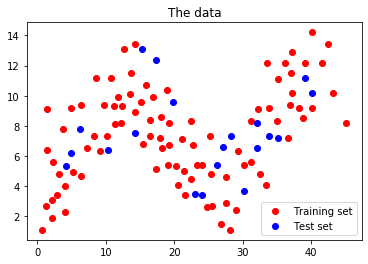

In [26]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='red', label='Training set')
plt.scatter(X_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')

## 2.2. Polynomial Regression with different degrees

Let's have a look at polynomial model fitted onto our dataset with **degrees = 1**:

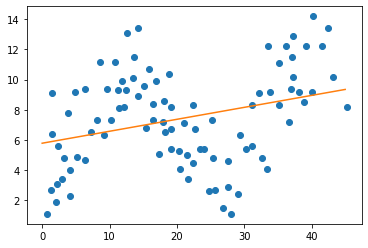

In [27]:
# X_train = X_train.reshape(92, )
# y_train = y_train.reshape(92, )

degrees = 1
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

You can see that this model is **oversimplified** - i.e. has high bias. Let's try out polynomial model with **degrees = 2**:

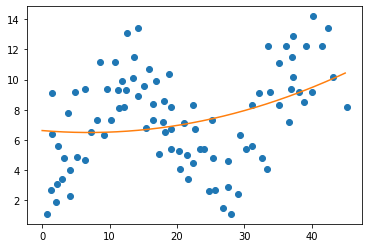

In [28]:
# X_train = X_train.reshape(92, )
# y_train = y_train.reshape(92, )

degrees = 2
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

This is better. As the model becomes more complicated, the curve captures more data on the graph. Let's try out polynomial model with **degrees = 20**:

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


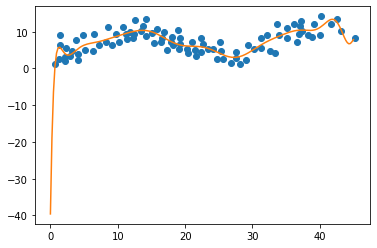

In [29]:
# X_train = X_train.reshape(92, )
# y_train = y_train.reshape(92, )

degrees = 20
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

Now, with the degree = 20, the model is **too complicated**, as it pays attention to small variations across our dataset. In other words, the model has high variance. 

**The question is: what is the best number of degrees in polynomial model that would give us the most accurate results, and optimize bias and variance errors?**

For that, let's calculate the following four values **for each degree**, from 1 to 80.
   - test error
   - training error
   - squared bias error
   - variance error
 
> irreducible error $ \sigma_{\epsilon}^2 $ is just a constant, thus it's redundant

## 2.3. Calculating errors with different polynomial degrees

In [30]:
#Reshaping X and y

X_train = np.array(X_train)
X_train = np.reshape(X_train, (-1, 1))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (-1, 1))

y_train = np.array(y_train)
y_train = np.reshape(y_train, (-1, 1))
    
y_test = np.array(y_test)
y_test = np.reshape(y_test, (-1, 1))

In [33]:
test_error = []
train_error = []
bias_squared = []
variance_squared = []

degrees = range(1, 60)

for deg in degrees:
    # Define and train features on Polynomial
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_X_train = poly.fit_transform(X_train)
    
    # Fit into Linear regression (required for building polynomial regression, learn more on how a polynomial is built in scikit-learn)
    reg = LinearRegression().fit(poly_X_train, y_train)
    
    # Predict y_train
    poly_predict_y_train = reg.predict(poly_X_train)

    # Predict y_test
    poly_X_test = poly.fit_transform(X_test)
    poly_predict_y_test = reg.predict(poly_X_test)
    
    
    test_error.append(np.mean((poly_predict_y_test - y_test) ** 2))
    train_error.append(np.mean((poly_predict_y_train - y_train) ** 2))
    bias_squared.append((np.mean(poly_predict_y_test, 1) - y_test) ** 2)
    variance_squared.append( np.mean( (poly_predict_y_test-np.mean(poly_predict_y_test))**2 ) )
    
    
    

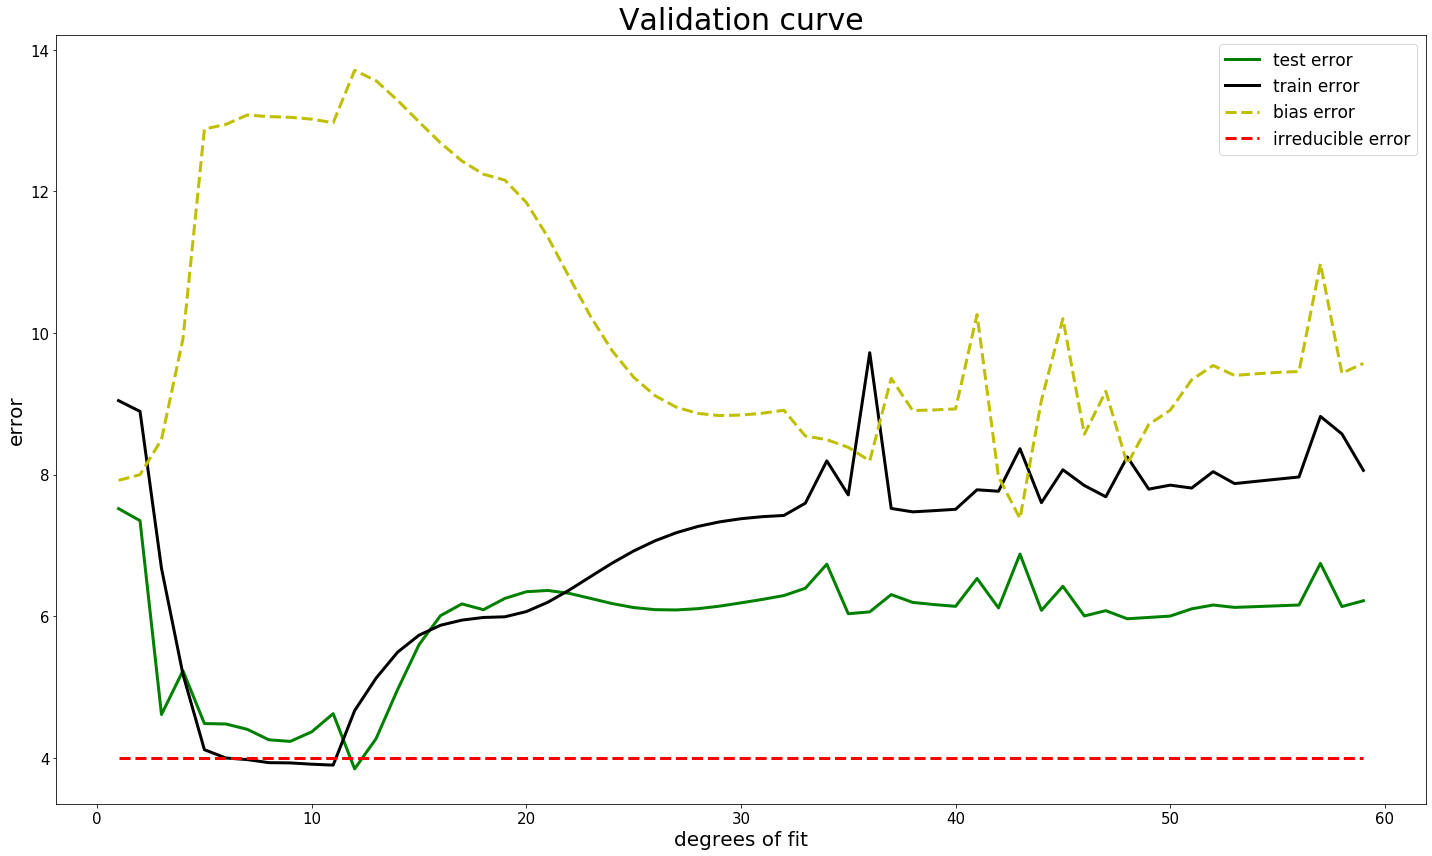

In [34]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(20, 12))

# Test error
plt.plot(degrees, test_error, 'g', linewidth=3.0, label='test error')

# Train error
plt.plot(degrees, train_error, 'k', linewidth=3.0, label='train error')

# Bias error
plt.plot(degrees, np.mean(np.mean(bias_squared, 1), 1), 'y--', linewidth=3.0, label='bias error')

# Variance error
#plt.plot(degrees, variance_squared, 'o--', linewidth=3.0, label='variance error')

#Irreducible error
plt.plot(degrees, 4 * np.ones_like(degrees), 'r--', linewidth=3.0, label='irreducible error')

plt.legend(loc='best', prop={'size':17})
plt.xlabel('degrees of fit', size = 20)
plt.ylabel('error', size = 20)
plt.title('Validation curve', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.tight_layout()

We see that with the degrees = 8 or 9, the model has minimum train and test error. Let's draw a polynomial function with 10 degrees to how it will look like.

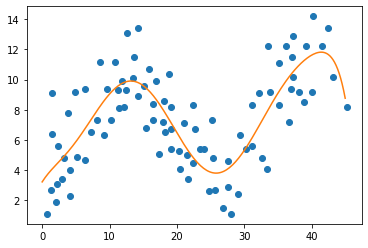

In [36]:
degrees = 9
p = np.poly1d(np.polyfit(X_train.reshape(-1, ), y_train.reshape(-1, ), degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

Looks good.

# 3. Validation curve (with library)

In [38]:
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(model, 
                                                   df['x'][:, np.newaxis], 
                                                   df['y'],
                                                   param_name='polynomialfeatures__degree',
                                                   param_range=degrees)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


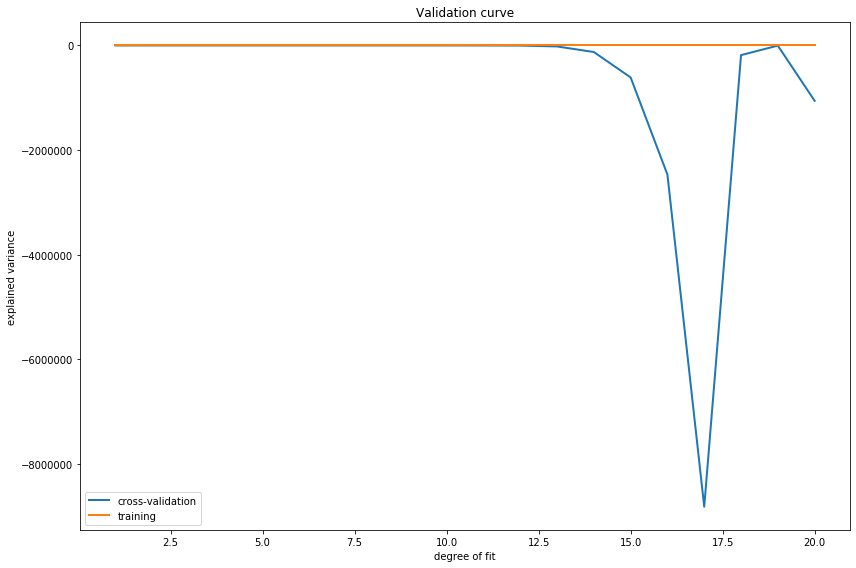

In [39]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(12, 8))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

# Learning curves

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


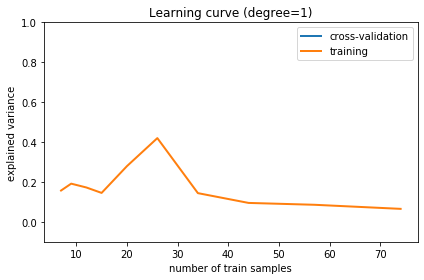

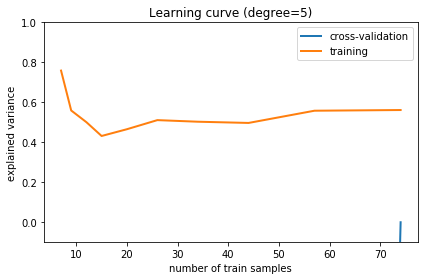

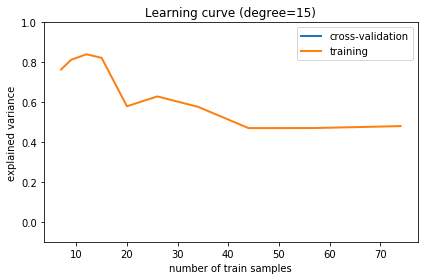

In [37]:
# A learning curve for d=1, 5, 15
for d in [1, 5, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, validation_scores = learning_curve(model, 
                                                                  df['x'][:, np.newaxis], 
                                                                  df['y'],
                                                                  train_sizes=np.logspace(-1,0,10)
                                                                 )

    
    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1), lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1), lw=2, label='training')
    plt.ylim(ymin=-.1, ymax=1)

    plt.legend(loc='best')
    plt.xlabel('number of train samples')
    plt.ylabel('explained variance')
    plt.title('Learning curve (degree=%i)' % d)
    plt.tight_layout()


plt.show()

# Calculating scores

$ MSE = E \ [(y-\hat{f}(x))^2] $

In [ ]:
# defining MSE error       
test_squared_error = np.mean((y_hat_test - y_test) ** 2, 1)

In [ ]:
test_squared_error

train score

In [ ]:
train_squared_error = np.mean((y_hat_train - y_train) ** 2)

In [ ]:
train_squared_error

$ Bias = ( \ E[\hat{f}(x)] - f(x) \ )^2 $

In [ ]:
# defining bias
bias_squared = (np.mean(y_hat_test, 1) - X_test) ** 2

$ Variance = E \ [(\hat{f}(x)-E[\hat{f}(x)])^2] $

In [ ]:
#defining variance
var_y_hat_test = np.var(y_hat_test, 1)

In [ ]:
degrees = np.arange(1, 21)
len(y_hat_test)

If we do this for five models, from degree d=0 (horizontal line) all the way to degree d=4, we get the following plot.

In [ ]:
#plot the graph
plt.figure(figsize=(12, 8))

plt.plot(degrees, np.mean(validation_scores, 1), 'g', linewidth=3.0)
plt.plot(degrees, np.mean(train_scores, 1), 'k', linewidth=3.0)
#plt.plot(degrees, np.mean(bias_squared, 1), 'y--')
#plt.plot(degrees, np.mean(var_y_hat_test, 1), 'b--')
#plt.plot(degrees, (1 ** 2) * np.ones_like(degrees), 'r--')

plt.xticks(degrees)
plt.xlabel('d', size=12)
plt.legend(['test error', 'training error', r'bias squared: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
            r'$var(\hat{f}(x))$', r'irreducible error: $\sigma_\epsilon^2$'], loc='upper center', fontsize=12)

plt.ylim([0, 12])
plt.show()

## 

In [ ]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')
#plt.plot(degrees, bias_squared.mean(axis=1), lw=2, label='bias')
#plt.plot(degrees, (sigma_epsilon ** 2) * np.ones_like(degrees), 'r--')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

In [ ]:
test_squared_error

In [ ]:
def f(x):
    return .5 * x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2

In [ ]:
sigma_epsilon = 1

In [ ]:
N = 1000

#generating x values for this example
x_max = 3
x = 3 * (2 * np.random.rand(N) - 1)

#generating epsilon values for this example
epsilon = sigma_epsilon * np.random.randn(N)

#generating y values for this example
y = f(x) + epsilon

#generating y_test values for this example
y_test = f(3.2) + sigma_epsilon * np.random.randn()

In [ ]:
#plot the graph
plt.figure(figsize=(12, 6))
x_range = np.linspace(-x_max, x_max, 1000)
plt.scatter(x, y)
plt.plot(x_range, f(x_range), 'r', linewidth=3.0)
plt.scatter(x_test, y_test, c='r')
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.xticks(np.arange(-x_max, x_max + 1))
plt.show()

In [ ]:
test_error = []
train_error = []
bias_squared = []
var_error = []

degrees = range(1, 80)

for deg in degrees:
    # Train features
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly.fit_transform(X_train)
    
    # Linear regression
    reg = LinearRegression().fit(x_poly_train, y_train)
    
    #predict y_train
    poly_predict_ytrain = reg.predict(x_poly_train)

    # Compare with test data
    x_poly_test = poly.fit_transform(X_test)
    poly_predict_ytest = reg.predict(x_poly_test)
    #poly_mse = mean_squared_error(y_test, poly_predict)
    
    
    score_train.append(reg.score(x_poly_train, y_train))
    score_test.append(reg.score(x_poly_test, y_test))
    
    test_error.append(np.mean((poly_predict_ytest - y_test) ** 2))
    train_error.append(np.mean((poly_predict_ytrain - y_train) ** 2))
    
    bias_squared.append((np.mean(poly_predict_ytest, 1) - y_test) ** 2)
    #var_error.append(np.mean((poly_predict_ytest - np.mean(poly_predict_ytest))**2))
    #var_error.append(np.var(poly_predict_ytest))